In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('CreditCardData (1).csv')

In [4]:
data.head()

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#2546 884,13-Oct-20,23,MasterCard,Tap,£17,Online,Restaurant,United Kingdom,Russia,United Kingdom,F,36,Barclays,0
1,#2546 895,14-Oct-20,21,Visa,Tap,£28,Online,Gaming,United Kingdom,United Kingdom,United Kingdom,M,41,RBS,0
2,#2546 903,13-Oct-20,19,Visa,Tap,£8,Online,Subscription,United Kingdom,United Kingdom,United Kingdom,M,32,Barclays,0
3,#2546 906,14-Oct-20,9,MasterCard,PIN,£186,ATM,Entertainment,United Kingdom,United Kingdom,United Kingdom,F,65,Barclays,0
4,#2546 920,13-Oct-20,22,Visa,PIN,£86,Online,Children,United Kingdom,United Kingdom,United Kingdom,F,61,Monzo,0


In [5]:
#Checking null values...
data.isnull().sum()

Transaction ID            0
Date                      0
Time                      0
Type of Card              0
Entry Mode                0
Amount                    0
Type of Transaction       0
Merchant Group            0
Country of Transaction    0
Shipping Address          0
Country of Residence      0
Gender                    0
Age                       0
Bank                      0
Fraud                     0
dtype: int64

In [6]:
data.shape

(100000, 15)

In [7]:
data['Fraud'].value_counts()

0    92810
1     7190
Name: Fraud, dtype: int64

In [8]:
data.dtypes

Transaction ID            object
Date                      object
Time                       int64
Type of Card              object
Entry Mode                object
Amount                    object
Type of Transaction       object
Merchant Group            object
Country of Transaction    object
Shipping Address          object
Country of Residence      object
Gender                    object
Age                        int64
Bank                      object
Fraud                      int64
dtype: object

In [9]:
# Separating features and target..
features = data.loc[:,data.columns!='Fraud']
target = data['Fraud']

#Doing label encoding of all categorical variables...
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = ["Type of Card", "Entry Mode", "Type of Transaction", "Merchant Group", "Country of Transaction", "Shipping Address", "Country of Residence", "Gender", "Bank"]

for col in categorical_cols:
    features[col] = encoder.fit_transform(features[col])

C:\Users\Dell\AppData\Local\Temp\ipykernel_25620\1427822433.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[col] = encoder.fit_transform(features[col])


In [10]:
features['Amount'] = features["Amount"].str.slice(1).astype(int)

C:\Users\Dell\AppData\Local\Temp\ipykernel_25620\67469329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['Amount'] = features["Amount"].str.slice(1).astype(int)


In [11]:
features["Date"] = pd.to_datetime(features['Date'], format="%d-%b-%y")

C:\Users\Dell\AppData\Local\Temp\ipykernel_25620\2832474733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["Date"] = pd.to_datetime(features['Date'], format="%d-%b-%y")


In [12]:
features.head()

,Transaction ID,Date,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank
0,#2546 884,2020-10-13,23,0,1,17,1,7,4,2,4,0,36,0
1,#2546 895,2020-10-14,21,1,1,28,1,5,4,4,4,1,41,7
2,#2546 903,2020-10-13,19,1,1,8,1,9,4,4,4,1,32,0
3,#2546 906,2020-10-14,9,0,0,186,0,2,4,4,4,0,65,0
4,#2546 920,2020-10-13,22,1,0,86,1,0,4,4,4,0,61,6


In [13]:
features.dtypes

Transaction ID                    object
Date                      datetime64[ns]
Time                               int64
Type of Card                       int32
Entry Mode                         int32
Amount                             int32
Type of Transaction                int32
Merchant Group                     int32
Country of Transaction             int32
Shipping Address                   int32
Country of Residence               int32
Gender                             int32
Age                                int64
Bank                               int32
dtype: object

In [14]:
# EDA
# Checking statistical summary of continous variables...
features.loc[:,["Time", "Amount", "Age"]].describe()

,Time,Amount,Age
count,100000.000000,100000.000000,100000.000000
mean,14.559320,112.566480,53.081630
std,5.315905,123.428493,18.742452
min,0.000000,5.000000,21.000000
25%,10.000000,17.000000,37.000000
50%,15.000000,30.000000,53.000000
75%,19.000000,208.000000,69.000000
max,23.000000,400.000000,85.000000


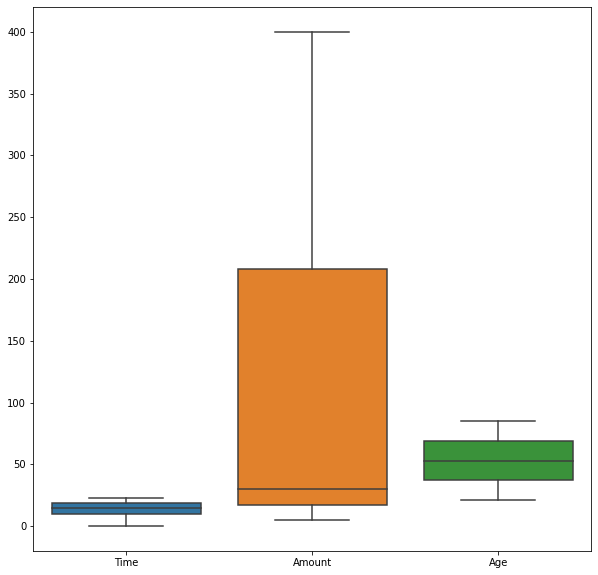

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10,10))
sns.boxplot(features[["Time", "Amount", "Age"]])
plt.show()

<AxesSubplot:xlabel='Bank,target'>

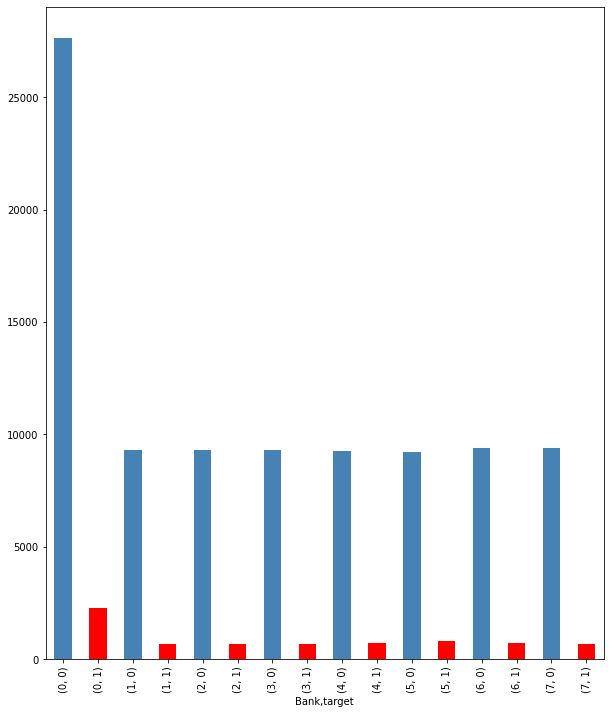

In [16]:
plt.figure(figsize = (10,12))
tmpData = pd.DataFrame({'Bank':features["Bank"],'target':target})
tmpData.groupby('Bank').agg('value_counts').plot(kind = 'bar', color = ['steelblue', 'Red'])

<AxesSubplot:xlabel='Time,target'>

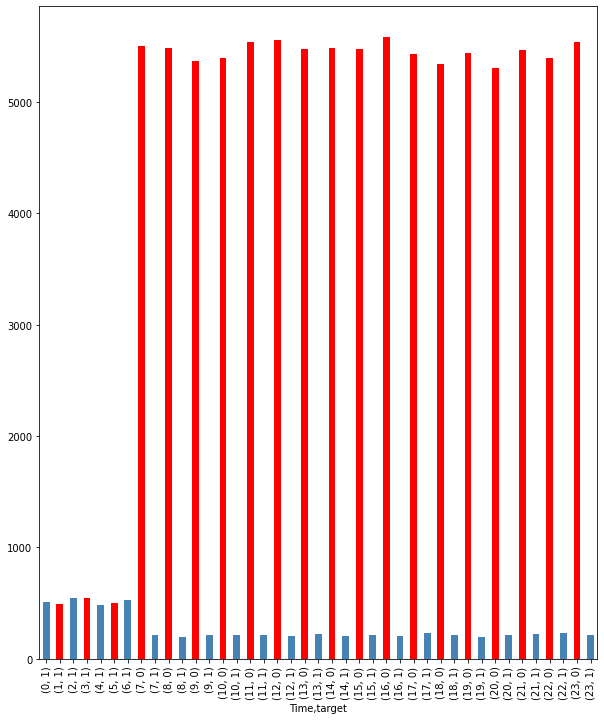

In [17]:
plt.figure(figsize = (10,12))
tmpData = pd.DataFrame({'Time':features["Time"],'target':target})
tmpData.groupby('Time').agg('value_counts').plot(kind = 'bar', color = ['steelblue', 'Red'])

<AxesSubplot:xlabel='Type of Card,target'>

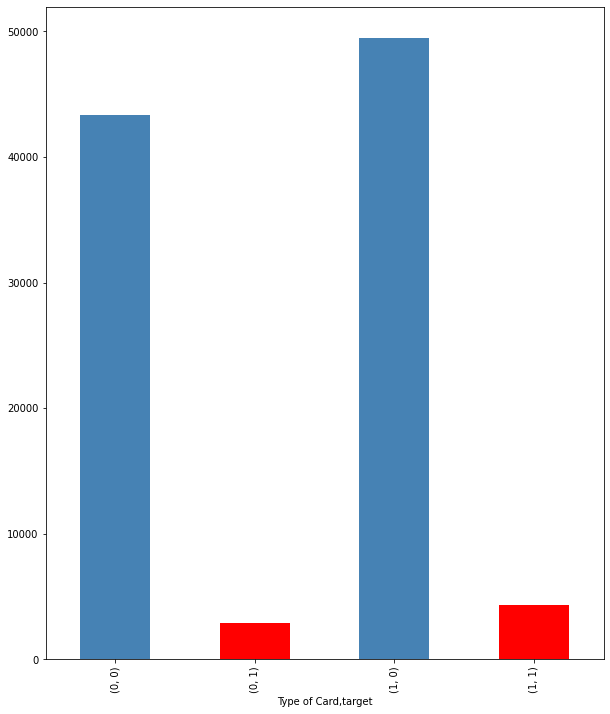

In [18]:
plt.figure(figsize = (10,12))
tmpData = pd.DataFrame({'Type of Card':features["Type of Card"],'target':target})
tmpData.groupby('Type of Card').agg('value_counts').plot(kind = 'bar', color = ['steelblue', 'Red'])

<AxesSubplot:xlabel='Gender,target'>

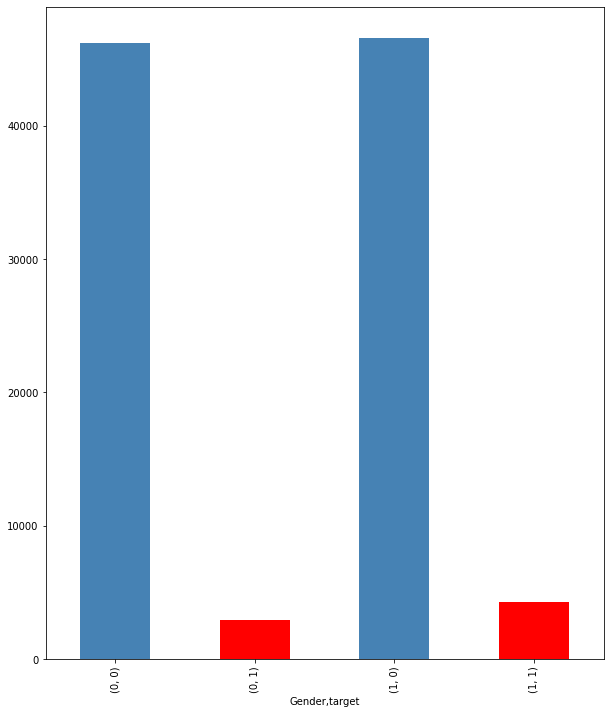

In [20]:
plt.figure(figsize = (10,12))
tmpData = pd.DataFrame({'Gender':features["Gender"],'target':target})
tmpData.groupby('Gender').agg('value_counts').plot(kind = 'bar', color = ['steelblue', 'Red'])

<AxesSubplot:xlabel='Entry Mode,target'>

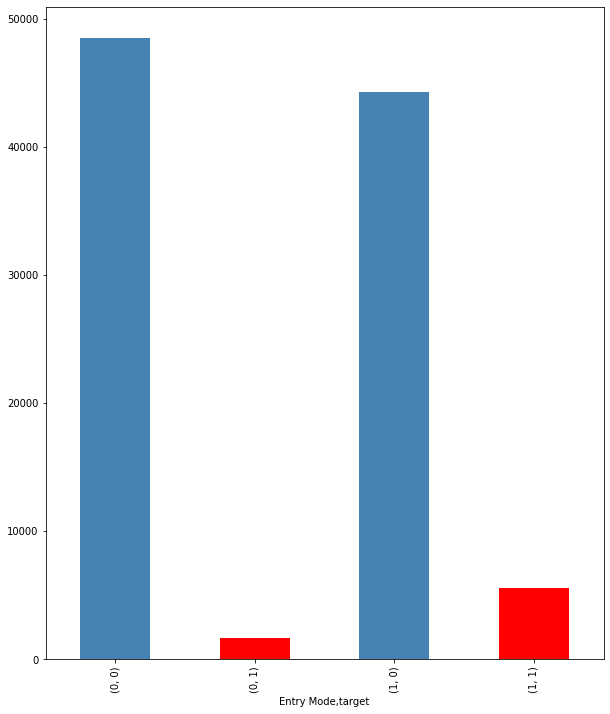

In [21]:
plt.figure(figsize = (10,12))
tmpData = pd.DataFrame({'Entry Mode':features["Entry Mode"],'target':target})
tmpData.groupby('Entry Mode').agg('value_counts').plot(kind = 'bar', color = ['steelblue', 'Red'])

<AxesSubplot:xlabel='Type of Transaction,target'>

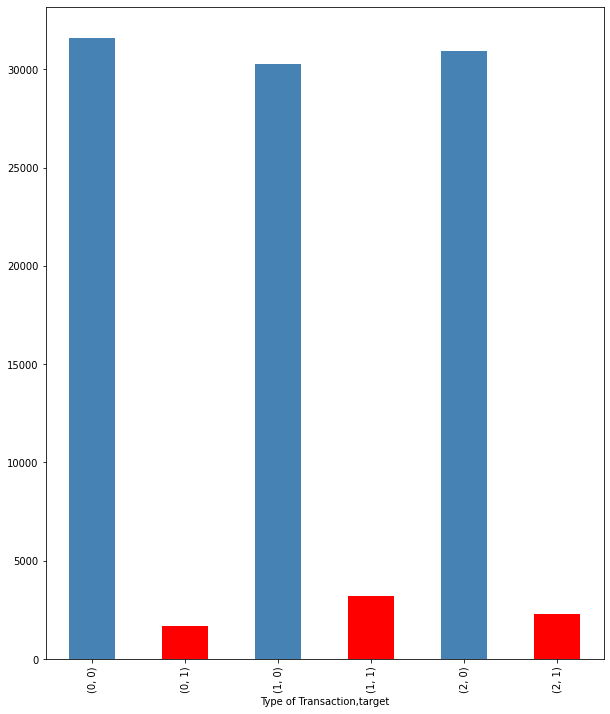

In [22]:
plt.figure(figsize = (10,12))
tmpData = pd.DataFrame({'Type of Transaction':features["Type of Transaction"],'target':target})
tmpData.groupby('Type of Transaction').agg('value_counts').plot(kind = 'bar', color = ['steelblue', 'Red'])

<AxesSubplot:xlabel='Merchant Group,target'>

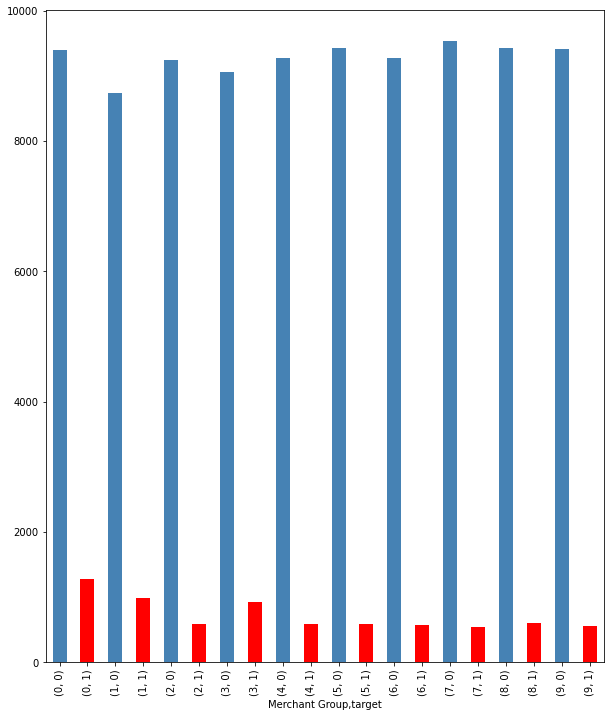

In [23]:
plt.figure(figsize = (10,12))
tmpData = pd.DataFrame({'Merchant Group':features["Merchant Group"],'target':target})
tmpData.groupby('Merchant Group').agg('value_counts').plot(kind = 'bar', color = ['steelblue', 'Red'])

<AxesSubplot:>

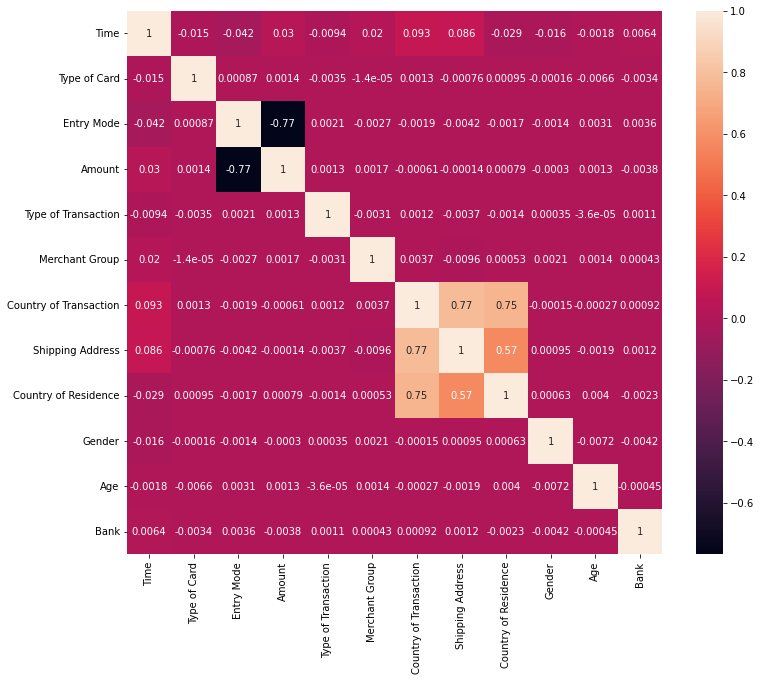

In [37]:
corrMat = features.corr()
plt.figure(figsize = (12,10))
sns.heatmap(corrMat, annot = True)

In [46]:
# Data Preprocessing...
# Removing unwanted columns...
features = features.drop(["Transaction ID", "Country of Residence", "Country of Transaction", "Date"], axis = 1)


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [56]:
xTrain, xTest, yTrain, yTest = train_test_split(features, target)

In [57]:
logreg = LogisticRegression()
logreg.fit(xTrain, yTrain)

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
predictions = logreg.predict(xTest)

In [59]:
confusion_matrix(yTest, predictions)

array([[23017,   187],
       [ 1256,   540]], dtype=int64)

In [61]:
treeModel = DecisionTreeClassifier()
treeModel.fit(xTrain,yTrain)

DecisionTreeClassifier()

In [62]:
predictions = treeModel.predict(xTest)

In [68]:
confusion_matrix(yTest, predictions)

array([[22209,   995],
       [  701,  1095]], dtype=int64)